In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from crowd_tracker_lidar3d.loader import load_data_to_dataframe
from crowd_tracker_lidar3d.plot_tools import plot_pointcloud3d

In [3]:
bag_dir = os.path.dirname(os.path.abspath(''))
bag_dir = os.path.join(bag_dir, "data")
data = load_data_to_dataframe('1m_1person-front_lidar-velodyne_points', bag_dir)

In [4]:
data.shape

(8708643, 6)

In [5]:
data.head()

,rosbagTimestamp,x,y,z,intensity,time
0,1585676343998862698,1.316860,0.683471,-0.397546,52.0,-0.099374
1,1585676343998862698,1.278028,0.663033,0.025131,47.0,-0.099372
2,1585676343998862698,1.489500,0.772413,-0.387366,47.0,-0.099370
3,1585676343998862698,2.275012,1.179255,0.134294,8.0,-0.099367
4,1585676343998862698,1.352574,0.701108,-0.296136,31.0,-0.099365


In [6]:
# Number of unique timestamps
len(data.rosbagTimestamp.unique())

431

In [7]:
timesteps = data.rosbagTimestamp.unique()

In [8]:
start = data[data.rosbagTimestamp == timesteps[0]]
end = data[data.rosbagTimestamp == timesteps[-1]]

In [9]:
print(len(start))
print(len(end))

20302
20216


### 3D Plot using matplotlib

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


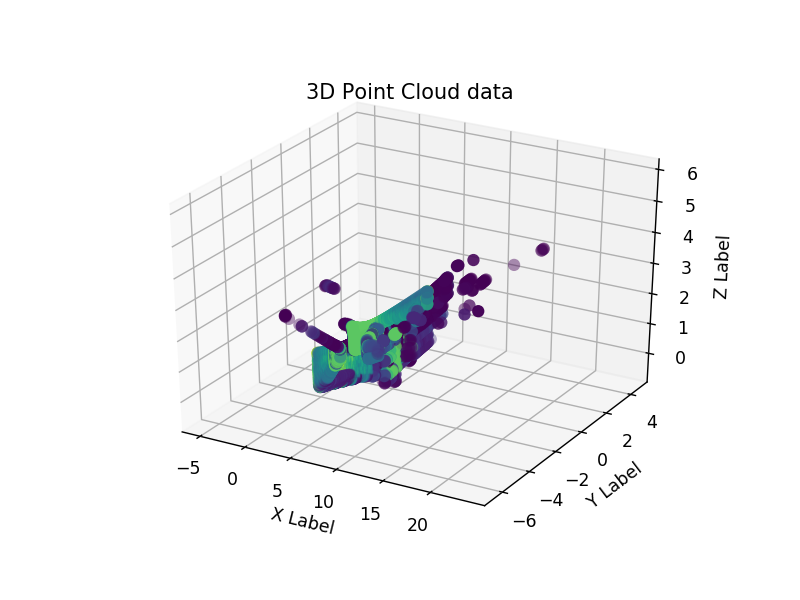

In [11]:
plot_pointcloud3d(start)

<IPython.core.display.Javascript object>


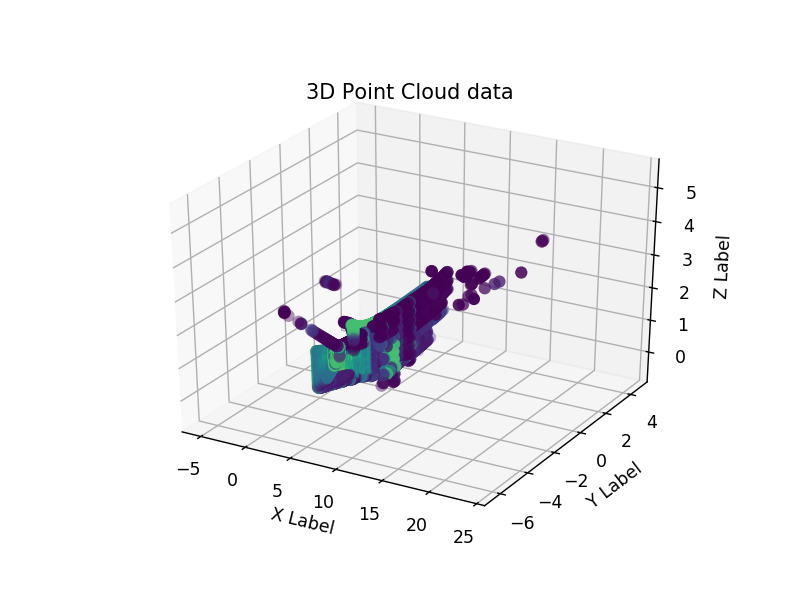

In [12]:
plot_pointcloud3d(end)

### 3D Plot using pptk

In [13]:
import pptk

In [14]:
v = pptk.viewer(start[['x', 'y', 'z']]) 
v.attributes(start['intensity'])
v.set(point_size=0.001)

In [46]:
v.capture('/home/brudermueller/Downloads/pcl_{}.png'.format(str(timesteps[0])))

In [31]:
len(timesteps)

431

In [36]:
# take only every 20th timestep
subsample = timesteps[::20]

In [56]:
len(subsample)

22

In [55]:
import time
for t in subsample: 
    pcl = data[data.rosbagTimestamp == t]
    v = pptk.viewer(pcl[['x', 'y', 'z']]) 
    v.attributes(pcl['intensity'])
    v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=10)    
    time.sleep(3)
    v.capture('/home/brudermueller/Downloads/pcl_{}.png'.format(str(t)))
    time.sleep(3)
    v.close()

In [54]:
v = pptk.viewer(start[['x', 'y', 'z']]) 
v.attributes(start['intensity'])
v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=10)